## Импорт библиотек

In [75]:
import pandas as pd
import random
import requests
from scipy.cluster.vq import whiten, kmeans2

## Функция получения данных

In [76]:
# 16 мин
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = {'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5'}).json()
        return json[result_key]
    except:
        print(json)
        return None

## Получаем турнирную таблицу

In [77]:
standings = call_api('http://api.football-data.org/v2/competitions/2001/standings', 'standings')
teams_info = {}
for table in standings:
    for team in table['table']:
        if team['lost'] == 0:
            k = 1
        else:
            k = team['lost']
        squadMarketValue = random.randint(10000 // k, 1000000 // k)
        if team['team']['id'] in teams_info:
            if team['lost'] > teams_info[team['team']['id']]['lost']:
                teams_info[team['team']['id']]['lost'] = team['lost']
                teams_info[team['team']['id']]['squadMarketValue'] = squadMarketValue
        else:
            teams_info[team['team']['id']] = {'name': team['team']['name'],
                                              'lost': team['lost'],
                                              'squadMarketValue': squadMarketValue}
teams_pd = pd.DataFrame(teams_info).T
teams_pd

,lost,name,squadMarketValue
66,1,Manchester United FC,672213
729,2,FC Basel 1893,228071
1900,3,PFC CSKA Moskva,162306
1903,6,Sport Lisboa e Benfica,75355
5,1,FC Bayern München,927488
524,1,Paris Saint-Germain FC,546163
726,5,RSC Anderlecht,142379
732,5,Celtic FC,125040
61,1,Chelsea FC,506797
100,1,AS Roma,611514


## Исследуем

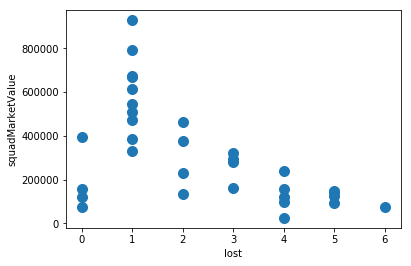

In [78]:
teams_pd['lost'] = pd.to_numeric(teams_pd['lost'])
teams_pd['squadMarketValue'] = pd.to_numeric(teams_pd['squadMarketValue'])
del teams_pd['name']
teams_pd.plot.scatter(x='lost', y='squadMarketValue', s=100)

## Анализ 3-х и 5-и кластеров

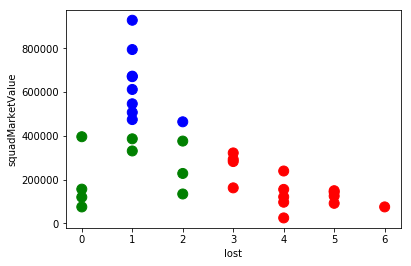

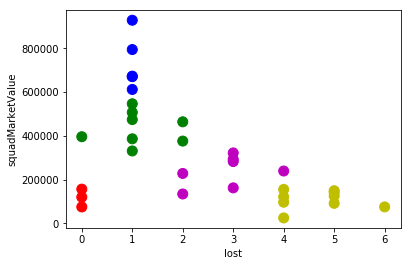

In [79]:
for i in [3, 5]:
    whitened = whiten(teams_pd.values)
    centroids, cluster_map = kmeans2(whitened, i)
    colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
    colors = [colors_map[c] for c in cluster_map]
    teams_pd.plot.scatter(x='lost', y='squadMarketValue', c=colors, s=100)
